## MNIST 데이터셋 분류를 위한 MLP 구현

### 구현조건

- 데이터셋 구성
  - MNIST 데이터셋 훈련 60,000, 테스트 10,000
  - 훈련 데이터셋의 10000개를 검증 데이터셋으로 사용

- 데이터 전처리
  - 입력데이터 정규화 0.0 ~ 1.0

- 네트워크 구조
  - 2개의 은닉층 1개의 출력층
  - 512 ReLU
  - 256 ReLU
  - 첫 번째 두 번째 은닉층 사이에 Dropout 0.25

- 학습 파라미터
  - Batch size: 100
  - Epochs: 20
  - Optimizer: Adam
  - Loss Function: Sparse Categorical Cross Entropy

- 입력 데이터셋
  - input (28,28)
  - 1차원 배열
  -

- 성능평가
  - accuracy

- 그래프 / 결과 및 분석

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [8]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.datasets import mnist

BATCH_SIZE = 100

# MNIST 데이터셋 로드
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 데이터 전처리 Reshape 사용 (28, 28) -> (28. * 28)
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# TensorFlow Dataset으로 변환
mnist_train = tf.data.Dataset.from_tensor_slices((train_images, train_labels))

# 검증 데이터셋 10000개 추출
mnist_valid = mnist_train.take(10000).batch(BATCH_SIZE)

# 나머지 50000개는 훈련 데이터셋
mnist_train = mnist_train.skip(10000).batch(BATCH_SIZE)

# 모델 구성 (MLP)
model = models.Sequential()
# model.add(layers.Flatten(input_shape=(28, 28)))  # Flatten 사용시
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # output layer

# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
history = model.fit(mnist_train,
                    epochs=20,
                    validation_data=mnist_valid)

# 모델 평가
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"테스트 정확도: {test_acc:.4f}")


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


500/500 ━━━━━━━━━━━━━━━━━━━━ 18s 33ms/step - accuracy: 0.8529 - loss: 0.4922 - val_accuracy: 0.9547 - val_loss: 0.1490
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - accuracy: 0.9591 - loss: 0.1371 - val_accuracy: 0.9662 - val_loss: 0.1185
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - accuracy: 0.9731 - loss: 0.0895 - val_accuracy: 0.9691 - val_loss: 0.1086
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9774 - loss: 0.0715 - val_accuracy: 0.9657 - val_loss: 0.1163
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9815 - loss: 0.0563 - val_accuracy: 0.9749 - val_loss: 0.0832
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step - accuracy: 0.9852 - loss: 0.0453 - val_accuracy: 0.9764 - val_loss: 0.0850
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - accuracy: 0.9851 - loss: 0.0439 - val_accuracy: 0.9764 - val_loss: 0.0881
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.9879 - loss: 0.0361 - val_accurac

In [3]:
model_path = "/content/drive/MyDrive/SSU/Pattern/mnist_mlp/mnist_mlp_model.keras"

### 학습데이터 그래프

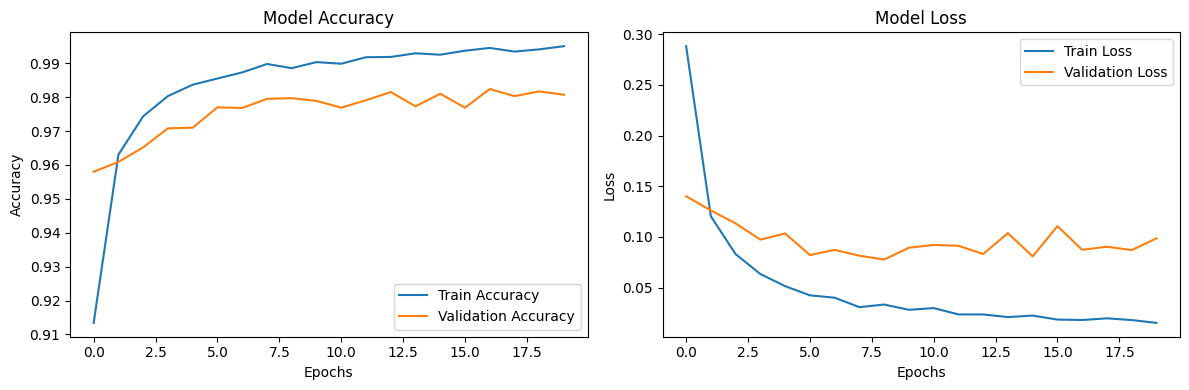

In [4]:
from matplotlib import pyplot as plt

# 학습 정확도 및 손실 그래프 그리기
plt.figure(figsize=(12, 4))

# 정확도 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# 손실 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## 결과 및 분석

위의 그래프를 보면 epochs 5회 진행 후부터 val_loss에 해당하는 부분이 크게 줄어들지 않고 횡보하는 것을 볼 수 있다.  
이 부분부터 학습은 거의 마무리가 된 것을 알 수 있고, 5 ~ 7.5부터는 과적합이 되고 있기 때문에 10회 주변으로는 val_loss가 증가하는 것으로 확인할 수 있다.

## 모델 저장

In [6]:
model.save(model_path)

In [7]:
from tensorflow.keras.models import load_model
model = load_model(model_path)